## 1b)

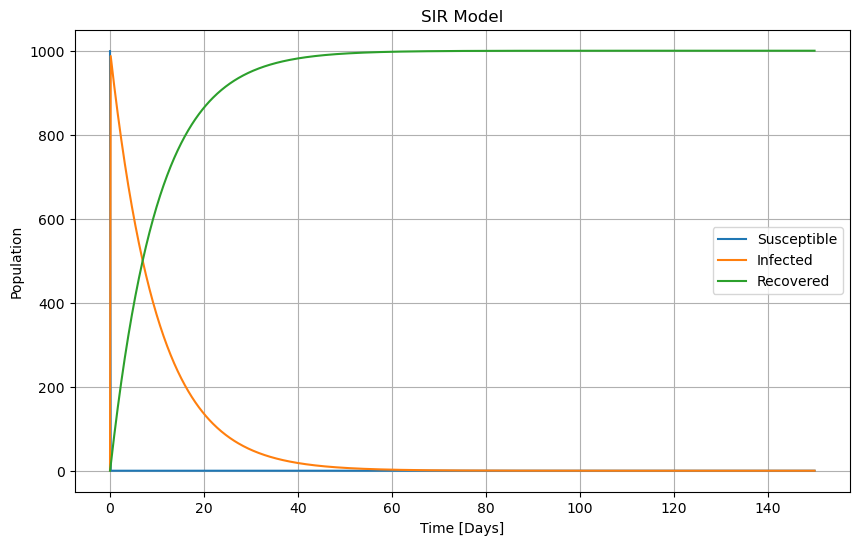

In [24]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the SIR model function
def sir_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Set initial conditions
S0 = 999  # Initial susceptible population
I0 = 1  # Initial infected population
R0 = 0  # Initial recovered population

# Set the parameters
beta = 0.3  # Transmission rate
gamma = 0.1  # Recovery rate

# Set the time points
t = np.linspace(0, 150, 1000)  # Time points from 0 to 150 with 1000 intervals

# Solve the differential equations
y0 = [S0, I0, R0]
sol = odeint(sir_model, y0, t, args=(beta, gamma))

# Extract the results
S, I, R = sol[:, 0], sol[:, 1], sol[:, 2]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time [Days]')
plt.ylabel('Population')
plt.title('SIR Model')
plt.legend()
plt.grid(True)
plt.show()

## 1C)

The SIR model looks at how a disease spreads through a population by splitting people into three groups - those who can get the disease (Susceptibles), those who currently have it (Infected), and those who had it and recovered (Recovered). The spread depends on two factors - how easily it passes from an infected person to a susceptible one, called the transmission rate (β), and how quickly infected people recover, called the recovery rate (γ).

Initially, the number of infected people grows exponentially, as each infected person passes it to more than one susceptible on average, provided the transmission rate is higher than the recovery rate. The peak number of infections happens when new infections and recoveries balance out. After the peak, the pool of susceptible people shrinks, slowing transmission. So infections decline. The outbreak ends when nearly everyone has been infected and recovered.

R0 is defined as the average number of new infections caused by each infected person early in the outbreak, when most contacts are with susceptible individuals. It's calculated as the transmission rate β divided by the recovery rate γ.

If R0 is less than 1, each infected person transmits to fewer than 1 other on average, so the disease can't spread effectively. The number of infected people will decline steadily to zero without a major outbreak.

If R0 is greater than 1, each infected person transmits to more than 1 other on average, causing exponential growth early on. The higher the R0, the more rapid the growth and the bigger the peak number infected.

With a very high R0, the disease spreads uncontrollably fast with many people infected quickly. Public health measures aim to reduce R0 through social distancing, quarantines, etc. Getting R0 below 1 is key to containing an outbreak.

Even diseases with high R0 values eventually peak and decline due to the declining pool of susceptible individuals. But a higher R0 generally causes a later, bigger peak, potentially overburdening health systems. So R0 is a key factor determining the severity of an outbreak.

## 2b)

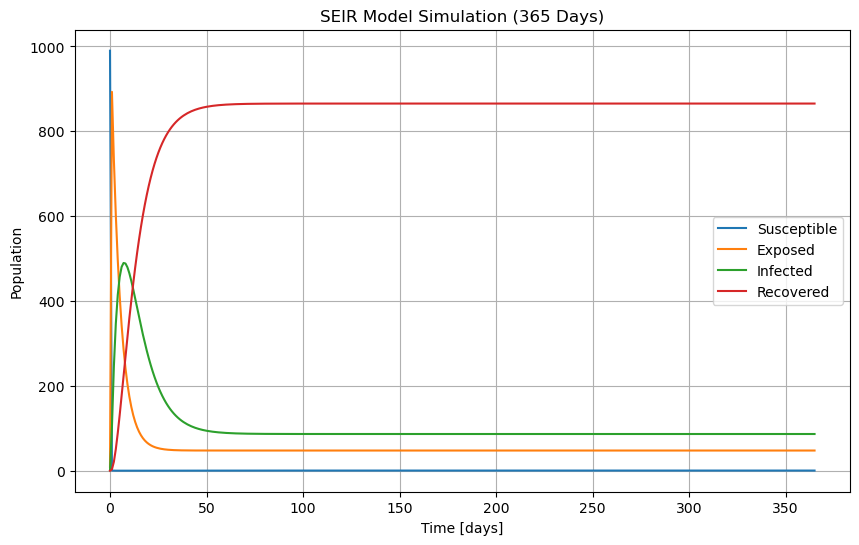

In [23]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def seir_model(y, t, beta, sigma, gamma, mu, N):
    S, E, I, R = y
    dSdt = mu * N - beta * S * I - mu * S
    dEdt = beta * S * I - (sigma + mu) * E
    dIdt = sigma * E - (gamma + mu) * I
    dRdt = gamma * I - mu * R
    return [dSdt, dEdt, dIdt, dRdt]

# Set initial conditions
S0 = 990  # Initial susceptible population
E0 = 9    # Initial exposed population
I0 = 1    # Initial infected population
R0 = 0    # Initial recovered population

# Set the parameters
beta = 0.3  # Transmission rate
sigma = 0.2  # Rate of exposed individuals becoming infectious
gamma = 0.1  # Recovery rate
mu = 0.01   # Birth and death rate
N = S0 + E0 + I0 + R0  # Total population

# Set the time points
t = np.linspace(0, 365, 365)  # Time points for 365 days

# Solve the differential equations
y0 = [S0, E0, I0, R0]
sol = odeint(seir_model, y0, t, args=(beta, sigma, gamma, mu, N))

# Extract the results
S, E, I, R = sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible')
plt.plot(t, E, label='Exposed')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time [days]')
plt.ylabel('Population')
plt.title('SEIR Model Simulation (365 Days)')
plt.legend()
plt.grid(True)
plt.show()


## 2C)

Adding an exposed compartment and accounting for birth/death rates creates a more realistic SEIR model with some important differences in pandemic dynamics:

The exposed (E) compartment represents people who have been infected but are not yet infectious themselves. This adds a time delay between when someone gets infected and when they can transmit to others. By including people who've been infected but aren't contagious yet in an "exposed" group, the model now accounts for the delay between when someone catches the virus and when they can actually pass it on.

This means transmission doesn't take off instantly like in the basic model. There's an initial lag before exposed people become infectious, slowing down the early growth rate. It also drags out the overall epidemic timeline. Even as infectious cases drop, there are still exposed people who'll transition into the infectious group, extending the tail end.

Adding in birth and death rates (μ) makes the model more realistic too. With births, new susceptible people keep entering the population rather than having susceptibles eventually run out. Deaths reduce everyone proportionally, but high death rates from the disease itself could substantially cut transmission by reducing the population. 

The introduction of the "Exposed" compartment and birth and death rates in the SEIR model adds more realism to the modeling of disease dynamics. These factors allow for a more accurate representation of how diseases spread in populations, including delays in disease transmission, changes in population size, and the potential for diseases to persist at endemic levels.